In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report, confusion_matrix


In [4]:

datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2,   
                             rotation_range=25,
                             zoom_range=0.2,
                             horizontal_flip=True)

train_data = datagen.flow_from_directory(data_dir,
                                         target_size=(224,224),
                                         batch_size=16,
                                         class_mode="binary",
                                         subset="training")

val_data = datagen.flow_from_directory(data_dir,
                                       target_size=(224,224),
                                       batch_size=16,
                                       class_mode="binary",
                                       subset="validation",
                                       shuffle=False)


Found 190 images belonging to 3 classes.
Found 47 images belonging to 3 classes.


In [22]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
for images, labels in train_data.take(1):
    print(labels[:10])  


tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]], shape=(10, 1), dtype=float32)


In [24]:
history = model.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5632 - loss: 0.7537 - val_accuracy: 0.7447 - val_loss: 0.5312
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6684 - loss: 0.6227 - val_accuracy: 0.7872 - val_loss: 0.5124
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6737 - loss: 0.5793 - val_accuracy: 0.7660 - val_loss: 0.5355
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6526 - loss: 0.6088 - val_accuracy: 0.7660 - val_loss: 0.4962
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7105 - loss: 0.5654 - val_accuracy: 0.7660 - val_loss: 0.5087
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6842 - loss: 0.5701 - val_accuracy: 0.7660 - val_loss: 0.5093
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7368 - loss: 0.5360 - val_accuracy: 0.7660 - val_loss: 0.4985
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6842 - loss: 0.5493 - val_accuracy: 0.7872 - val_loss:

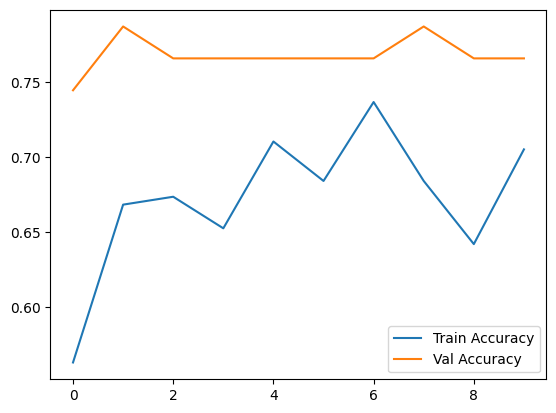

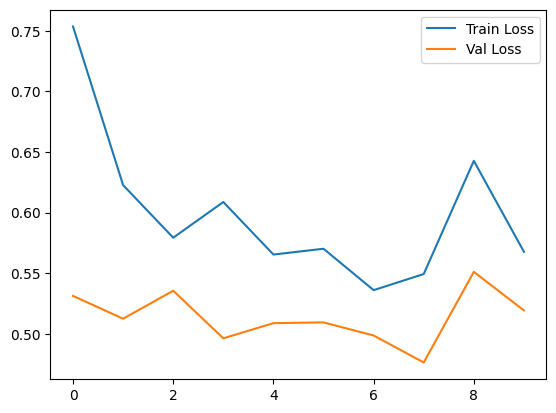

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


In [26]:
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc*100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7660 - loss: 0.5192
Validation Accuracy: 76.60%


In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image


img_path = "brain_tumor_dataset/yes/Y1.jpg"

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("🧠 Brain Tumor Detected")
else:
    print("✅ No Brain Tumor")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
🧠 Brain Tumor Detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


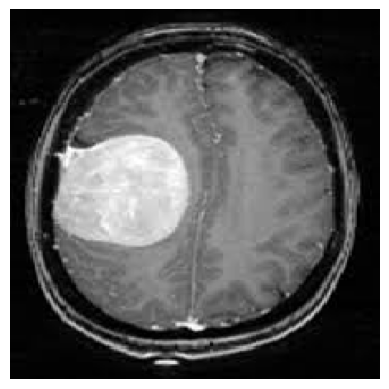

🧠 Brain Tumor Detected


In [28]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np


img_path = "brain_tumor_dataset/yes/Y1.jpg"


img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array_exp)


plt.imshow(img)
plt.axis('off')
plt.show()


if prediction[0][0] > 0.5:
    print("🧠 Brain Tumor Detected")
else:
    print("✅ No Brain Tumor")


In [31]:
import os

no_folder = "brain_tumor_dataset/no"
print(os.listdir(no_folder)) 


['.ipynb_checkpoints', '1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg', '14 no.jpg', '15 no.jpg', '17 no.jpg', '18 no.jpg', '19 no.jpg', '2 no.jpeg', '20 no.jpg', '22 no.jpg', '23 no.jpg', '24 no.jpg', '25 no.jpg', '27 no.jpg', '28 no.jpg', '29 no.jpg', '3 no.jpg', '30 no.jpg', '32 no.jpg', '33 no.jpg', '34 no.jpg', '35 no.jpg', '37 no.jpg', '38 no.jpg', '39 no.jpg', '4 no.jpg', '40 no.jpg', '42 no.jpg', '43 no.jpg', '44no.jpg', '45 no.jpg', '47 no.jpg', '48 no.jpeg', '49 no.jpg', '5 no.jpg', '50 no.jpg', '6 no.jpg', '7 no.jpg', '8 no.jpg', '9 no.jpg', 'N15.jpg', 'N16.jpg', 'N17.jpg', 'N19.JPG', 'N2.JPG', 'N21.jpg', 'N22.JPG', 'N26.JPG', 'N3.jpg', 'N5.jpg', 'N6.jpg', 'no 1.jpg', 'no 10.jpg', 'no 100.jpg', 'no 3.jpg', 'no 4.jpg', 'no 5.jpeg', 'no 6.jpg', 'no 8.jpg', 'no 89.jpg', 'no 9.png', 'no 91.jpeg', 'no 92.jpg', 'no 94.jpg', 'no 95.jpg', 'no 97.jpg', 'no 98.jpg', 'no 99.jpg', 'No11.jpg', 'No12.jpg', 'No13.jpg', 'No15.jpg', 'No16.jpg', 'No17.jpg', 'No18.jpg', 'No20.j

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


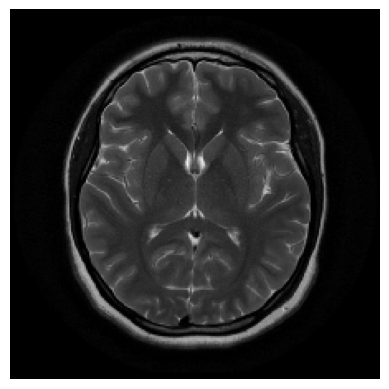

1 no.jpeg: ✅ No Brain Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


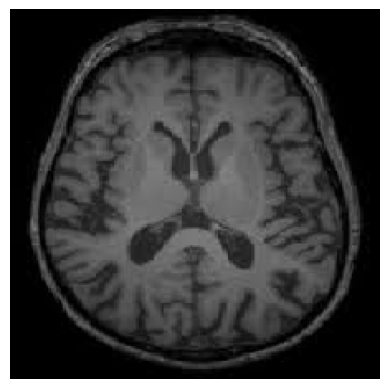

10 no.jpg: 🧠 Brain Tumor Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


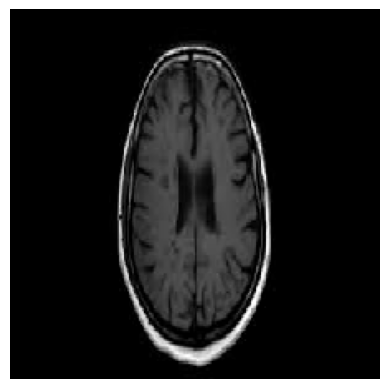

11 no.jpg: ✅ No Brain Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


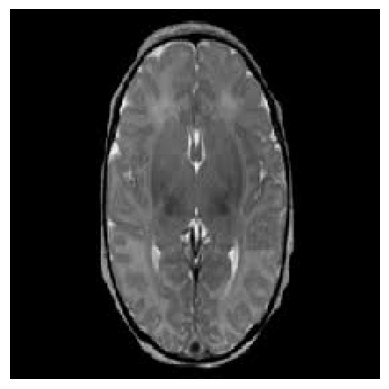

12 no.jpg: ✅ No Brain Tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


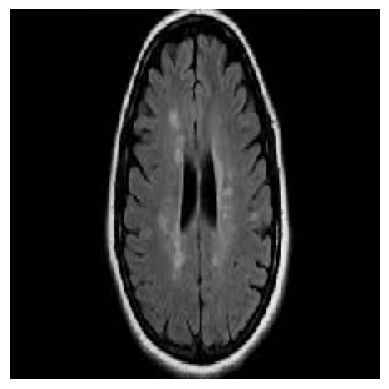

13 no.jpg: ✅ No Brain Tumor


In [32]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

no_folder = "brain_tumor_dataset/no"
files = [f for f in os.listdir(no_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for f in files[:5]: 
    img_path = os.path.join(no_folder, f)
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array_exp = np.expand_dims(img_array, axis=0)


    prediction = model.predict(img_array_exp)

    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Show result
    if prediction[0][0] > 0.5:
        print(f"{f}: 🧠 Brain Tumor Detected")
    else:
        print(f"{f}: ✅ No Brain Tumor")
